(Group 24)

(Benjamin Fletcher, Konrad Retzlaff, Sebastian Schmülling)

(i6308020, i6331164, i6304238)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

- **For the purpose of debugging, debugging plots and annoying dataframe looping we used ChatGPT and CoPilot (GPT, Claude ect.). To get information about packagages we referenced back to the package documentation.**

- **Additionally, autocompletion was used, which may be noticeable in more generic-looking parts of the script.**

# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available

**Instructions for the deliverable:**

* You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.

---

## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [1]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

f = 'data/task_1/lm_scores/'
df_x = pd.read_csv(os.path.join(f, 'lm_X.csv'))
df_y = pd.read_csv(os.path.join(f, 'lm_Y.csv'))
df_z = pd.read_csv(os.path.join(f, 'lm_Z.csv'))

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)

df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [3]:
# A


print("Value counts X:")
print(df_x['result'].value_counts())
print("Length unique value counts for results:",len(df_x['result'].value_counts()))
print("---------------------------------------------------------------------------------------------------------------------------------------------------")


print("Value counts Y:")
print(df_y['result'].value_counts())
print("Length unique value counts for results:",len(df_y['result'].value_counts()))
print("---------------------------------------------------------------------------------------------------------------------------------------------------")

print("Value counts Y:")
print(df_z['result'].value_counts())
print("Length unique value counts for results:",len(df_z['result'].value_counts()))



Value counts X:
result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressperson who reti

### Discussion


From the outputs from above one can see the some of the results are simple A,B,C, D as exptected. However, some are either justifying their answer or are explaining it.

Unexpected type examples:

- "Aswer: D"

- "A congressperson who retires to take a position teaching political science at a university, so the answer is A"

- "leaves more viable offspring than others of its species., so the answer is D"

-  "Rahit, so the answer is B"

- "Monoclonal antibodies, so the answer is C"


Further on it is also worth mentioning that one can see expected result, for instance "D" more often than once. This is due to white spaces.

Also oberserve that value_counts() returns a Series Object, with unique values as index and their counts as values. For the first model X we have 145, for Y 141 and for Z 560 counts of unique results. If the data would be clean, only containing expected values whe should get 4 counts in total for each Dataset. Particularly for LM Z, with 560 unique results it would be overly wasteful to drop at least 556 answers.

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [4]:
#A

#Create a deep copy of the dataframes
df_x_copy = df_x.copy(deep=True)
df_y_copy = df_y.copy(deep=True)
df_z_copy = df_z.copy(deep=True)

#Filter the dataframes to include only answers with less than 10 characters
df_x_copy = df_x_copy[df_x_copy['result'].str.len() < 10]
df_y_copy = df_y_copy[df_y_copy['result'].str.len() < 10]
df_z_copy = df_z_copy[df_z_copy['result'].str.len() < 10]

#value counts for x
print("Value counts X:")
print(df_x_copy['result'].value_counts())
print("Unique value count:",len(df_x_copy['result'].value_counts()))
print("---------------------------------------------------------------------------------------------------------------------------------------------------")

#value counts for y
print("Value counts Y:")
print(df_y_copy['result'].value_counts())
print("Unique value count:",len(df_y_copy['result'].value_counts()))
print("---------------------------------------------------------------------------------------------------------------------------------------------------")

#value counts for z
print("Value counts Y:")
print(df_z_copy['result'].value_counts())
print("Unique value count:",len(df_z_copy['result'].value_counts()))
print("---------------------------------------------------------------------------------------------------------------------------------------------------")


Value counts X:
result
A            2733
A            1657
B            1412
Answer: A    1398
C            1134
D            1124
B             793
Answer: B     760
C             622
Answer: D     613
D             596
Answer: C     594
Not Sure       73
Name: count, dtype: int64
Unique value count: 13
---------------------------------------------------------------------------------------------------------------------------------------------------
Value counts Y:
result
D            2894
Answer: D    1718
C            1701
B            1240
D            1145
A            1008
Answer: C     907
Answer: B     726
C             634
Answer: A     597
B             553
A             428
Not Sure       86
Name: count, dtype: int64
Unique value count: 13
---------------------------------------------------------------------------------------------------------------------------------------------------
Value counts Y:
result
D            2257
C            2191
B            2127
A            20

In [5]:
print("Sizes of the new dataframes after filtering for answers with < 10 characters:")
print("df_x_copy:", df_x_copy.shape)
print("df_y_copy:", df_y_copy.shape)
print("df_z_copy:", df_z_copy.shape)

print("---------------------------------------------------------------------------------------------------------------------------------------------------")
print("Number of rows lost during filtering compared to the original data frames:")
print("df_x_diff:", df_x.shape[0] - df_x_copy.shape[0])
print("df_y_diff:", df_y.shape[0] - df_y_copy.shape[0])
print("df_z_diff:", df_z.shape[0] - df_z_copy.shape[0])

Sizes of the new dataframes after filtering for answers with < 10 characters:
df_x_copy: (13509, 2)
df_y_copy: (13637, 2)
df_z_copy: (12878, 2)
---------------------------------------------------------------------------------------------------------------------------------------------------
Number of rows lost during filtering compared to the original data frames:
df_x_diff: 373
df_y_diff: 341
df_z_diff: 1045


In [6]:
#B
def clean_answer(s, pattern='-'):
    s = str(s).replace('Answer: ', '')
    #get rid of whitespaces in string
    s = s.strip()
    return s

#Task: Apply the function to the 'result' column of the three dataframes. 

df_x_copy['result'] = df_x_copy['result'].apply(clean_answer)
df_y_copy['result'] = df_y_copy['result'].apply(clean_answer)
df_z_copy['result'] = df_z_copy['result'].apply(clean_answer)

#drop nan 
df_x_copy = df_x_copy.dropna()
df_y_copy = df_y_copy.dropna()
df_z_copy = df_z_copy.dropna()

#drop 'Not Sure' values
df_x_copy = df_x_copy[df_x_copy['result'] != 'Not Sure']
df_y_copy = df_y_copy[df_y_copy['result'] != 'Not Sure']
df_z_copy = df_z_copy[df_z_copy['result'] != 'Not Sure']


#print value counts for x
print("Value counts X:")
print(df_x_copy['result'].value_counts())
print("---------------------------------------------------------------------------------------------------------------------------------------------------")

#print value counts for y
print("Value counts Y:")
print(df_y_copy['result'].value_counts())
print("---------------------------------------------------------------------------------------------------------------------------------------------------")

#print value counts for z
print("Value counts Y:")
print(df_z_copy['result'].value_counts())




Value counts X:
result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------------------
Value counts Y:
result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------------------
Value counts Y:
result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64


In [7]:
# Size before cleaning
print("Size before cleaning:")
print(df_x.shape)
print(df_y.shape)
print(df_z.shape)

# Size after cleaning
print("Size after cleaning and filtering:")
print(df_x_copy.shape)
print(df_y_copy.shape)
print(df_z_copy.shape)


# Difference in size
print("Difference in row reduction after data cleaning and filtering:")
print("df_x_dff:", df_x.shape[0] - df_x_copy.shape[0])
print("df_y_dff:", df_y.shape[0] - df_y_copy.shape[0])
print("df_z_diff:", df_z.shape[0] - df_z_copy.shape[0])

Size before cleaning:
(13882, 2)
(13978, 2)
(13923, 2)
Size after cleaning and filtering:
(13436, 2)
(13551, 2)
(12753, 2)
Difference in row reduction after data cleaning and filtering:
df_x_dff: 446
df_y_dff: 427
df_z_diff: 1170


### Discussion

**C. Discussion: Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?**

**Original sizes of the dataframes:**

- (13,882 rows, 2 columns)
- (13,978 rows, 2 columns)
- (13,923 rows, 2 columns)

Already after filtering the original Dataframe to include only answers with less than 10 characters once can see that all data frames only have a unique value count of 13. One can also see a strong reduction of rows during this first filtering operation: 

**Sizes of the new dataframes after filtering for answers with < 10 characters:**
- `df_x_copy`: (13,509 rows, 2 columns)
- `df_y_copy`: (13,637 rows, 2 columns)
- `df_z_copy`: (12,878 rows, 2 columns)

**Number of rows lost during this filtering step, compared to the original data frames:**
- `df_x_diff`: 373 rows lost
- `df_y_diff`: 341 rows lost
- `df_z_diff`: 1,045 rows lost

During the actual data cleaning we drop any NaN values and any "Not Sure" answers, leaving us with the following data frame dimensions: 

**Size after cleaning and filtering:**
- (13,436 rows, 2 columns)
- (13,551 rows, 2 columns)
- (12,753 rows, 2 columns)

**Difference in row reduction after data cleaning and filtering:**
- `df_x_diff`: 446 rows lost
- `df_y_diff`: 427 rows lost
- `df_z_diff`: 1,170 rows lost


Observe there is a stronger disbalance in the number of answers provided by each model as in the original dataframes. This may make a proper evaluation of the models performance difficult. Especially for LM Z since here are 1,170 potential answers to correspoonding questions are dropped. It is worth mentoining that 125 these where NaN and "Not Sure" values, however most of them might have been correct answers, just in a too long and wrong format. This might also lead to a disbalance in subjects. For instance LM Z could have been right with most of the questions of a certain subject, but struggled to provide them in a correct format. Thus most of the answers got filtered out which makes a propper and unbiased evaluation difficult. 

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [8]:
# A

df_x_copy = pd.merge(df_x_copy, df_test, on='question_id', how='inner')

df_y_copy = pd.merge(df_y_copy, df_test, on='question_id', how='inner')

df_z_copy = pd.merge(df_z_copy, df_test, on='question_id', how='inner')


In [9]:
# B

#new column correct
df_x_copy['correct'] = df_x_copy['result'] == df_x_copy['answer']
df_y_copy['correct'] = df_y_copy['result'] == df_y_copy['answer']
df_z_copy['correct'] = df_z_copy['result'] == df_z_copy['answer']

df_x_copy.head()



#get percentage of correct answers
print("Percentage of correct answers for X: ", df_x_copy['correct'].mean())
print("Percentage of correct answers for Y: ", df_y_copy['correct'].mean())
print("Percentage of correct answers for Z: ", df_z_copy['correct'].mean())


Percentage of correct answers for X:  0.7674903245013397
Percentage of correct answers for Y:  0.7458490148328537
Percentage of correct answers for Z:  0.663294911001333


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [10]:
#A

#for each subject get the number of answered questions

df = pd.concat([
    df_x_copy['subject'].value_counts(),
    df_y_copy['subject'].value_counts(),
    df_z_copy['subject'].value_counts()
], axis=1, keys=['Answers X', 'Answers Y', 'Answers Z'])

df.head()

,Answers X,Answers Y,Answers Z
subject,,,
professional law,1490,1488,1390
miscellaneous,759,755,716
moral scenarios,737,865,774
professional psychology,587,587,564
high school psychology,532,529,515


In [11]:
#create a list of subjects where |(Y-X)|/X > 0.1
df_XY = df[(abs(df['Answers Y'] - df['Answers X']) / df['Answers X']) > 0.1]

#create a list of subjects where |(Z-X)|/X > 0.1
df_XZ = df[(abs(df['Answers Z'] - df['Answers X']) / df['Answers X']) > 0.1]

#create a list of subjects where |(Z-Y)|/Y > 0.1
df_YZ = df[(abs(df['Answers Z'] - df['Answers Y']) / df['Answers Y']) > 0.1]

#merge them to one without duplicates 
df_XYZ = pd.concat([df_XY, df_XZ, df_YZ]).drop_duplicates()

print(df_XYZ)
print("Number of unbala nced subjects: ", len(df_XYZ))

                          Answers X  Answers Y  Answers Z
subject                                                  
moral scenarios                 737        865        774
logical fallacies               154        136        147
formal logic                    109        123        113
moral disputes                  329        304        250
college computer science         97         98         84
college chemistry                96         98         84
computer security                95         98         87
Number of unbala nced subjects:  7


In [12]:
#B

def stratified_bootstrap_score(df, n_bootstrap=100):

    subjects = df['subject'].unique()
    bootstrap_scores = []
    
    # Perform bootstrap iterations
    for _ in range(n_bootstrap):
        subject_scores = []
        # Process each subject separately
        for subject in subjects:
            # Select rows for the current subject
            df_subject = df[df['subject'] == subject]
            # Sample with replacement from the subject data
            sample = df_subject.sample(n=len(df_subject), replace=True)
            # Calculate mean accuracy for the subject and store it
            subject_scores.append(sample['correct'].mean())
        # Compute average score across all subjects for this iteration
        bootstrap_scores.append(np.mean(subject_scores))
    
    # Return overall mean score and its standard deviation (as standard error)
    return np.mean(bootstrap_scores), np.std(bootstrap_scores)




In [13]:
#C
# Example usage:
# df_x_copy, df_y_copy, df_z_copy should be DataFrames with 'subject' and 'correct' columns.
mean_x, se_x = stratified_bootstrap_score(df_x_copy)
mean_y, se_y = stratified_bootstrap_score(df_y_copy)
mean_z, se_z = stratified_bootstrap_score(df_z_copy)

print("Bootstrapped scores:")
print(f"Model X: {mean_x:.3f} ± {se_x:.3f}")
print(f"Model Y: {mean_y:.3f} ± {se_y:.3f}")
print(f"Model Z: {mean_z:.3f} ± {se_z:.3f}")

Bootstrapped scores:
Model X: 0.767 ± 0.004
Model Y: 0.740 ± 0.004
Model Z: 0.662 ± 0.005


In [14]:
print("Old scores:")
print("Percentage of correct answers for X: ", df_x_copy['correct'].mean())
print("Percentage of correct answers for Y: ", df_y_copy['correct'].mean())
print("Percentage of correct answers for Z: ", df_z_copy['correct'].mean())

Old scores:
Percentage of correct answers for X:  0.7674903245013397
Percentage of correct answers for Y:  0.7458490148328537
Percentage of correct answers for Z:  0.663294911001333


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [15]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [16]:
#A

from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_mse_acc(df: pd.DataFrame) -> list:

    df['num_correct'] = df['correct'].astype(int)
    results = []

    for model, group in df.groupby('model_name'):
        n = len(group)
        accuracy = group['correct'].mean()
        se = np.sqrt(accuracy * (1 - accuracy) / n)
        evaluation = {
            'model': model,
            'se': se,
            'accuracy': accuracy
        }
        results.append(evaluation)
    return results


results_mmlu = calculate_mse_acc(df_mmlu)
results_other = calculate_mse_acc(df_other)

df_result_mmlu = pd.DataFrame(results_mmlu)
df_result_other = pd.DataFrame(results_other)

print("Datsset LLMU\n:",df_result_mmlu)
print("Datsset Other\n:",df_result_other)

# The standard error (SE) is a way of measuring how much our estimate (like the mean accuracy) would change if we repeated the experiment multiple times

Datsset LLMU
:   model        se  accuracy
0     X  0.004038  0.743588
1     Y  0.003940  0.761542
2     Z  0.004393  0.655951
Datsset Other
:   model        se  accuracy
0     X  0.006667  0.787976
1     Y  0.007316  0.720936
2     Z  0.007659  0.671721


In [17]:
def confidence(z_score: float, df) -> pd.DataFrame:


    df['ci_lower'] = df['accuracy'] - (z_score * df['se'])
    df['ci_upper'] = df['accuracy'] + (z_score * df['se'])

    return df

In [18]:
df_result_mmlu = confidence(1.96, df_result_mmlu)
df_result_other = confidence(1.96, df_result_other)

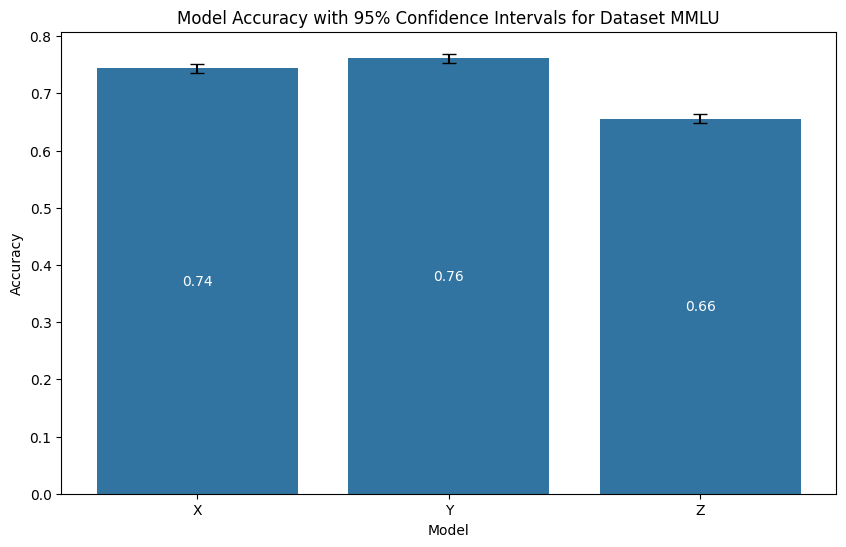

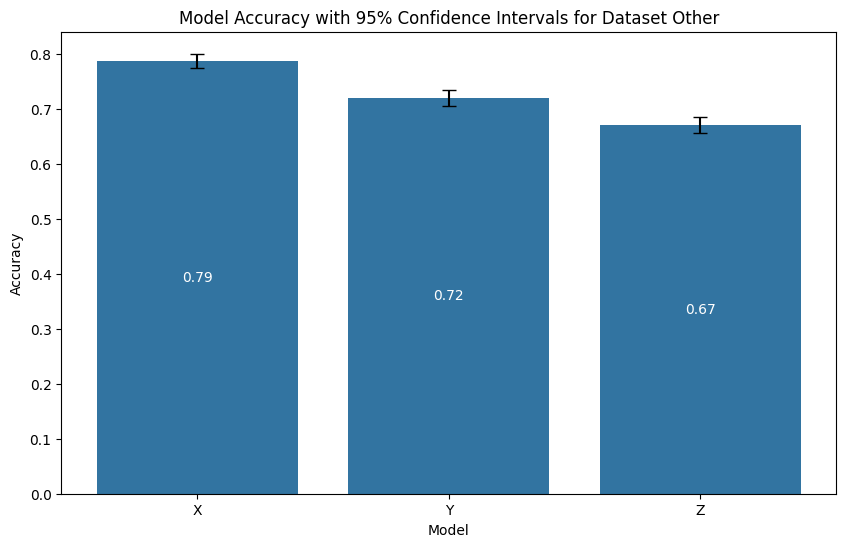

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# LLMU Dataset plot
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', data=df_result_mmlu)

for index, row in df_result_mmlu.iterrows():
    plt.errorbar(x=index, y=row['accuracy'], 
                 yerr=[[row['accuracy'] - row['ci_lower']], [row['ci_upper'] - row['accuracy']]],
                 fmt='none', c='black', capsize=5)
    plt.text(index, row['accuracy'] / 2, f"{row['accuracy']:.2f}", ha='center', va='center', color='white')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with 95% Confidence Intervals for Dataset MMLU')
plt.show()

# Other Dataset plot
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', data=df_result_other)

for index, row in df_result_other.iterrows():
    plt.errorbar(x=index, y=row['accuracy'], 
                 yerr=[[row['accuracy'] - row['ci_lower']], [row['ci_upper'] - row['accuracy']]],
                 fmt='none', c='black', capsize=5)
    plt.text(index, row['accuracy'] / 2, f"{row['accuracy']:.2f}", ha='center', va='center', color='white')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with 95% Confidence Intervals for Dataset Other')
plt.show()


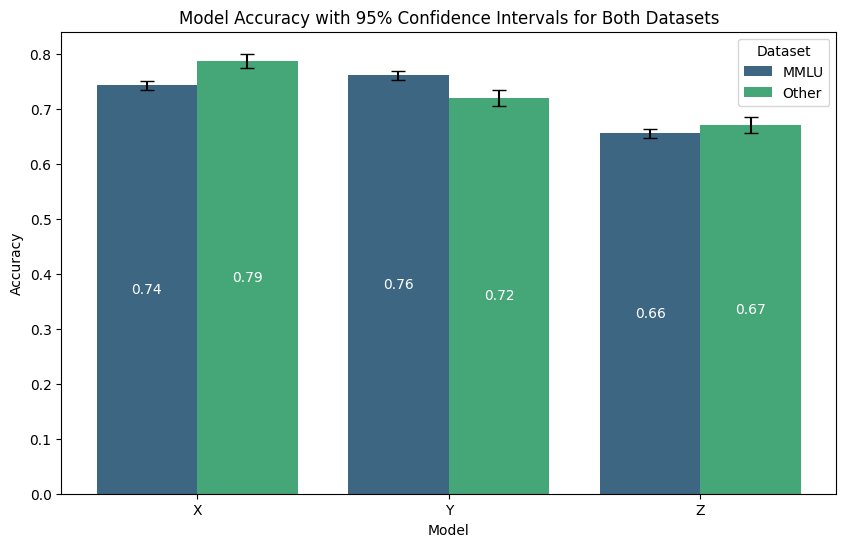

In [20]:
# Combined Dataset plot
df_result_mmlu['dataset'] = 'MMLU'
df_result_other['dataset'] = 'Other'
df_combined = pd.concat([df_result_mmlu, df_result_other], ignore_index=True)

models_order = sorted(df_combined['model'].unique())
datasets_order = ['MMLU', 'Other'] 

df_combined['model'] = pd.Categorical(df_combined['model'], categories=models_order, ordered=True)
df_combined['dataset'] = pd.Categorical(df_combined['dataset'], categories=datasets_order, ordered=True)
df_combined = df_combined.sort_values(['model', 'dataset'])

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='model', y='accuracy', hue='dataset',
                 data=df_combined, errorbar=None, palette="viridis")

for container, dataset in zip(ax.containers, datasets_order):
    subset = df_combined[df_combined['dataset'] == dataset]
    subset = subset.set_index('model').loc[models_order].reset_index()

    for bar, (_, row) in zip(container, subset.iterrows()):
        x = bar.get_x() + bar.get_width() / 2.
        y = bar.get_height()
        lower_err = y - row['ci_lower']
        upper_err = row['ci_upper'] - y
        error = [[lower_err], [upper_err]]

        ax.errorbar(x, y, yerr=error, fmt='none', c='black', capsize=5)
        ax.text(x, y / 2, f"{row['accuracy']:.2f}", ha='center', va='center', color='white')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy with 95% Confidence Intervals for Both Datasets')
plt.legend(title="Dataset")
plt.show()


### Discussion

Model X appears to be the best performing model overall, achieving the highest accuracy on the Other dataset (0.79) and maintaining competitive performance on LLMU (0.74). While Model Y slightly outperforms Model X on the LLMU dataset (0.76), it shows a noticeable drop in accuracy on the Other dataset (0.72). This suggests a less consistent generalisation across different data contexts. An interesting observation is the performance flip between models X and Y across the two datasets, which may indicate dataset-specific biases or differences in model generalisation capabilities. In addition, the overlapping confidence intervals for Model Z highlight its stable but suboptimal performance. On the other hand, the distinct confidence intervals for Models X and Y indicate statistically significant differences in performance between the datasets.

### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

2D Array of correct answer counts (rows: MMLU, Other; columns: A, B, C, D):
[[4259 2659 2409 2369]
 [1766  981  625  387]]


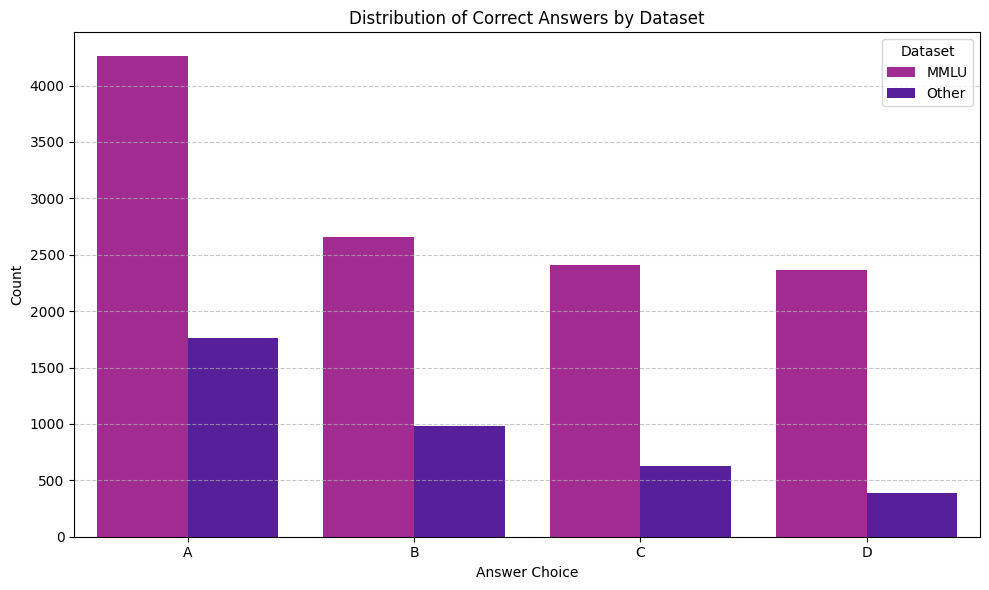

In [21]:
#A 
#remove duplicate questions (if each question_id should be counted only once)
unique_mmlu = df_mmlu.drop_duplicates('question_id')
unique_other = df_other.drop_duplicates('question_id')

#define the answer choices in order
answer_choices = ['A', 'B', 'C', 'D']

#count the occurrences of each answer for each dataset
counts_mmlu = unique_mmlu['result'].value_counts().reindex(answer_choices, fill_value=0).sort_index()
counts_other = unique_other['result'].value_counts().reindex(answer_choices, fill_value=0).sort_index()

#format the counts as a 2D array
#row 0 corresponds to MMLU and Row 1 corresponds to Other dataset
result_array = np.array([counts_mmlu.values, counts_other.values])
print("2D Array of correct answer counts (rows: MMLU, Other; columns: A, B, C, D):")
print(result_array)

#prepare a DataFrame in long format for Seaborn plotting
data = {
    'Answer': answer_choices * 2,  #each dataset contributes the same set of answers
    'Count': np.concatenate([counts_mmlu.values, counts_other.values]),
    'Dataset': ['MMLU'] * len(answer_choices) + ['Other'] * len(answer_choices)
}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
custom_palette = {'MMLU': '#b5179e', 'Other': '#560bad'}
sns.barplot(x='Answer', y='Count', hue='Dataset', data=df_plot, palette=custom_palette)

plt.title('Distribution of Correct Answers by Dataset')
plt.xlabel('Answer Choice')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
from scipy.stats import chi2_contingency

#perform the chi-square test of independence on the result_array.
chi2, p_value, dof, expected = chi2_contingency(result_array)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)

# Interpretation at α = 0.05
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of correct answers between the two datasets.")


Chi-square Statistic: 276.2083160074473
Degrees of Freedom: 3
p-value: 1.400388644681e-59
Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets.


### Conclusion 


Given the plot one can already see that there is a tendency in the distribution of correct answers,**in both datasets** towards answer A. Further on the chi-square test, indicates there is a a signifant difference in the distribution of correct anwers between the two datasets. The domincance of asnwer choice A gives indications towards a dataset bias, influecing model performance.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [23]:
# Filter data for language model X
df_mmlu_x = df_mmlu[df_mmlu['model_name'] == 'X']
df_other_x = df_other[df_other['model_name'] == 'X']

accuracy_mmlu = df_mmlu_x.groupby('result')['correct'].mean()
accuracy_other = df_other_x.groupby('result')['correct'].mean()

accuracy_df = pd.DataFrame({
    "MMLU Mean Accuracy": accuracy_mmlu,
    "Other Mean Accuracy": accuracy_other
}).fillna(0)

accuracy_df.index.name = "Answer Choice"
accuracy_df = accuracy_df.sort_index()

print(accuracy_df)

               MMLU Mean Accuracy  Other Mean Accuracy
Answer Choice                                         
A                        0.367927             0.594564
B                        0.884543             0.917431
C                        1.000000             1.000000
D                        1.000000             1.000000


In [24]:
from scipy.stats import ttest_ind
import numpy as np

#filter data for cases where the correct answer is "A" in both datasets
df_mmlu_x_A = df_mmlu_x[df_mmlu_x['answer'] == 'A']['correct'].astype(int)
df_other_x_A = df_other_x[df_other_x['answer'] == 'A']['correct'].astype(int)

#perform Welch's t-test 
t_stat, p_value = ttest_ind(df_mmlu_x_A, df_other_x_A, equal_var=False)

#compute means and standard deviations, necessary to calculate confidence intervals
mean_mmlu_A = df_mmlu_x_A.mean()
mean_other_A = df_other_x_A.mean()

std_mmlu_A = df_mmlu_x_A.std()
std_other_A = df_other_x_A.std()

n_mmlu_A = len(df_mmlu_x_A)
n_other_A = len(df_other_x_A)

# Calculate 95% confidence intervals for each dataset
ci_mmlu_A = (
    mean_mmlu_A - 1.96 * (std_mmlu_A / (n_mmlu_A ** 0.5)),
    mean_mmlu_A + 1.96 * (std_mmlu_A / (n_mmlu_A ** 0.5))
)
ci_other_A = (
    mean_other_A - 1.96 * (std_other_A / (n_other_A ** 0.5)),
    mean_other_A + 1.96 * (std_other_A / (n_other_A ** 0.5))
)

# Determine if we reject the null hypothesis at significance level alpha=0.05
alpha = 0.05

# Print results in a clear and formatted manner
print("=== Welch's T-test for Correct Answer 'A' ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value:     {p_value:.4f}")

# Dynamic hypothesis decision
if p_value < alpha:
    print(f"Result: Reject the Null Hypothesis (H₀) at alpha = {alpha}.")
    print("Interpretation: There is a significant difference in mean accuracy between the two datasets.\n")
else:
    print(f"Result: Fail to Reject the Null Hypothesis (H₀) at alpha = {alpha}.")
    print("Interpretation: There is no significant difference in mean accuracy between the two datasets.\n")

# Display summary statistics
print("MMLU Data (Answer 'A'):")
print(f"  Mean Accuracy      : {mean_mmlu_A:.4f}")
print(f"  95% Confidence Int : ({ci_mmlu_A[0]:.4f}, {ci_mmlu_A[1]:.4f})\n")

print("Other Data (Answer 'A'):")
print(f"  Mean Accuracy      : {mean_other_A:.4f}")
print(f"  95% Confidence Int : ({ci_other_A[0]:.4f}, {ci_other_A[1]:.4f})")


=== Welch's T-test for Correct Answer 'A' ===
T-statistic: -0.2116
P-value:     0.8324
Result: Fail to Reject the Null Hypothesis (H₀) at alpha = 0.05.
Interpretation: There is no significant difference in mean accuracy between the two datasets.

MMLU Data (Answer 'A'):
  Mean Accuracy      : 0.9727
  95% Confidence Int : (0.9647, 0.9806)

Other Data (Answer 'A'):
  Mean Accuracy      : 0.9740
  95% Confidence Int : (0.9645, 0.9835)


### B - Conclusion 

In both datasets LM X performs exceptionally well for answers B, C and D. In particular, it achieves 100% accuracy for C and D in both datasets. However, compared to the average accuracy of answer A, there is a notable difference for both datasets. Specifically for the MMLU dataset, LM X has a mean average of only 36%. 
Referring back to our previous observations, we were able to see a higher distribution of correct answers for answer A across all models. Combining the low accuracy and the high distribution of correct answers, it seems that model X has a stronger tendency to over-select answer A. This would explain the low accuracy of answer A, for both datasets. This over-reliance on answer A could explain the observed low accuracy, as the model may default to A even when it's not the correct choice, negatively affecting performance in both datasets. To be completely sure about this assumption, one should also look at the mean accuracies of the other models across all answer types. However, this seems beyond the scope of this task. 
Nevertheless, the t-test indicates that there is no significant difference in mean accuracy for answer A between the two datasets. This supports the assumption that the tendency to rely on answer A is not related to the data set.


In [25]:

# Filter data for cases where the correct answer is "A" and "C or D" in both datasets
df_mmlu_x_A = df_mmlu_x[df_mmlu_x['answer'] == 'A']['correct'].astype(int)
df_mmlu_x_C_D = df_mmlu_x[df_mmlu_x['answer'].isin(['C', 'D'])]['correct'].astype(int)
df_other_x_A = df_other_x[df_other_x['answer'] == 'A']['correct'].astype(int)
df_other_x_C_D = df_other_x[df_other_x['answer'].isin(['C', 'D'])]['correct'].astype(int)

alpha = 0.05

# -------------------------- MMLU dataset --------------------------

t_stat_mmlu, p_value_mmlu = ttest_ind(df_mmlu_x_A, df_mmlu_x_C_D, equal_var=False)

#decide whther to reject the null hypothesis
if p_value_mmlu < alpha:
    result_mmlu = "Reject the Null Hypothesis"
    interpretation_mmlu = "There is a significant difference in mean accuracy between answers 'A' and 'C or D'."
else:
    result_mmlu = "Fail to Reject the Null Hypothesis"
    interpretation_mmlu = "There is no significant difference in mean accuracy between answers 'A' and 'C or D'."

#compute mean and 95% confidence intervals for "C or D"
mean_mmlu_C_D = df_mmlu_x_C_D.mean()
std_mmlu_C_D = df_mmlu_x_C_D.std()
n_mmlu_C_D = len(df_mmlu_x_C_D)
ci_mmlu_C_D = (
    mean_mmlu_C_D - 1.96 * (std_mmlu_C_D / (n_mmlu_C_D ** 0.5)),
    mean_mmlu_C_D + 1.96 * (std_mmlu_C_D / (n_mmlu_C_D ** 0.5))
)

print("=== Welch's T-test for MMLU Data ('A' vs. 'C or D') ===")
print(f"T-statistic: {t_stat_mmlu:.4f}")
print(f"P-value:     {p_value_mmlu:.4f}")
print(f"Result: {result_mmlu} at alpha = {alpha}.")
print(f"Interpretation: {interpretation_mmlu}\n")
print(f"Mean Accuracy (C or D): {mean_mmlu_C_D:.4f}")
print(f"95% Confidence Interval (C or D): ({ci_mmlu_C_D[0]:.4f}, {ci_mmlu_C_D[1]:.4f})\n")

#---------------------------- Other dataset ----------------------------

t_stat_other, p_value_other = ttest_ind(df_other_x_A, df_other_x_C_D, equal_var=False)

#decide whether to reject the null hypothesis
if p_value_other < alpha:
    result_other = "Reject the Null Hypothesis"
    interpretation_other = "There is a significant difference in mean accuracy between answers 'A' and 'C or D'."
else:
    result_other = "Fail to Reject the Null Hypothesis"
    interpretation_other = "There is no significant difference in mean accuracy between answers 'A' and 'C or D'."

# Compute mean and 95% confidence intervals for "C or D"
mean_other_C_D = df_other_x_C_D.mean()
std_other_C_D = df_other_x_C_D.std()
n_other_C_D = len(df_other_x_C_D)
ci_other_C_D = (
    mean_other_C_D - 1.96 * (std_other_C_D / (n_other_C_D ** 0.5)),
    mean_other_C_D + 1.96 * (std_other_C_D / (n_other_C_D ** 0.5))
)

print("=== Welch's T-test for Other Data ('A' vs. 'C or D') ===")
print(f"T-statistic: {t_stat_other:.4f}")
print(f"P-value:     {p_value_other:.4f}")
print(f"Result: {result_other} at alpha = {alpha}.")
print(f"Interpretation: {interpretation_other}\n")
print(f"Mean Accuracy (C or D): {mean_other_C_D:.4f}")
print(f"95% Confidence Interval (C or D): ({ci_other_C_D[0]:.4f}, {ci_other_C_D[1]:.4f})")


=== Welch's T-test for MMLU Data ('A' vs. 'C or D') ===
T-statistic: 44.0588
P-value:     0.0000
Result: Reject the Null Hypothesis at alpha = 0.05.
Interpretation: There is a significant difference in mean accuracy between answers 'A' and 'C or D'.

Mean Accuracy (C or D): 0.6690
95% Confidence Interval (C or D): (0.6581, 0.6799)

=== Welch's T-test for Other Data ('A' vs. 'C or D') ===
T-statistic: 25.1395
P-value:     0.0000
Result: Reject the Null Hypothesis at alpha = 0.05.
Interpretation: There is a significant difference in mean accuracy between answers 'A' and 'C or D'.

Mean Accuracy (C or D): 0.6466
95% Confidence Interval (C or D): (0.6230, 0.6703)




### C - Conclusion

This supports what was indicated in A already. For both datasets **there is a significant difference in the mean accuracies** between Answer 'A' and 'C' or 'B'.

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [96]:

#A
final_accuracy_mmlu_df = pd.DataFrame()
final_accuracy_other_df = pd.DataFrame()

models = df_mmlu['model_name'].unique()

for model in models:
    df_mmlu_model = df_mmlu[df_mmlu['model_name'] == model]
    df_other_model = df_other[df_other['model_name'] == model]

    accuracy_mmlu = df_mmlu_model.groupby('result')['correct'].mean()
    accuracy_other = df_other_model.groupby('result')['correct'].mean()
    
    mmlu_row = pd.DataFrame(accuracy_mmlu).T
    other_row = pd.DataFrame(accuracy_other).T
    
    mmlu_row.index = [model]
    other_row.index = [model]
    
    final_accuracy_mmlu_df = pd.concat([final_accuracy_mmlu_df, mmlu_row])
    final_accuracy_other_df = pd.concat([final_accuracy_other_df, other_row])


print("Mean accuracies MMLU Dataset:")
print(final_accuracy_mmlu_df)
print("\nMean accuracies Other Dataset:")
print(final_accuracy_other_df)


Mean accuracies MMLU Dataset:
result         A         B         C         D
X       0.367927  0.884543  1.000000  1.000000
Y       0.937500  0.897606  0.827861  0.631608
Z       0.476103  0.654073  0.703429  0.727487

Mean accuracies Other Dataset:
result         A         B         C         D
X       0.594564  0.917431  1.000000  1.000000
Y       0.973988  0.923940  0.775578  0.435103
Z       0.709865  0.742032  0.657358  0.549367


### B - Discussion


 Despite a higher overall distribution of correct answers for A across models, again the obervation that LM X seems to answer A too frequently. Almost like default. This is evident from its 36% accuracy on A in the MMLU dataset compared to its perfect scores on C and D. 

 For Model Y it seems almost reversed. Across both  datasets it shows a good mean accuracy for answers A and B. Its accuracy is dropping for C, and particullarly for answer type D to 43.5% for the Other dataset. However, recalling the correct answer distribution from earlier, it seems there is less a bias issue than for LM X. This is because the correct answer distribution for answer type 'D' is compareable low. 
 
 Model Z exhibits a more balanced and less extreme performance compared to both LM X and LM Y. While its highest accuracy level is 74.2% it has a moderate accuracy distribution across both datasets. However, it is worth mentoning that it only achieved  a mean accuracy of 47.6% for answer type 'A' for dataset MMLU. This might highlight a specific area of weakness despite its generally even performance profile.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?

B. /Discuss:/


A,14,Find the maximum possible order for an element of S_n for n = 10.,6,12,30,105,C,abstract algebra,False,X


A,14,Find the maximum possible order for an element of S_n for n = 10.,30,12,6,105,A,abstract algebra,True,X

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

Model: X, N: 11696, M: 1.0
Model: Y, N: 11696, M: 1.0
Model: Z, N: 11696, M: 1.0
  Model  Original Accuracy  Test-Retest Score
0     X           0.743588           0.588406
1     Y           0.761542           0.571648
2     Z           0.655951           0.441604


<Figure size 1000x500 with 0 Axes>

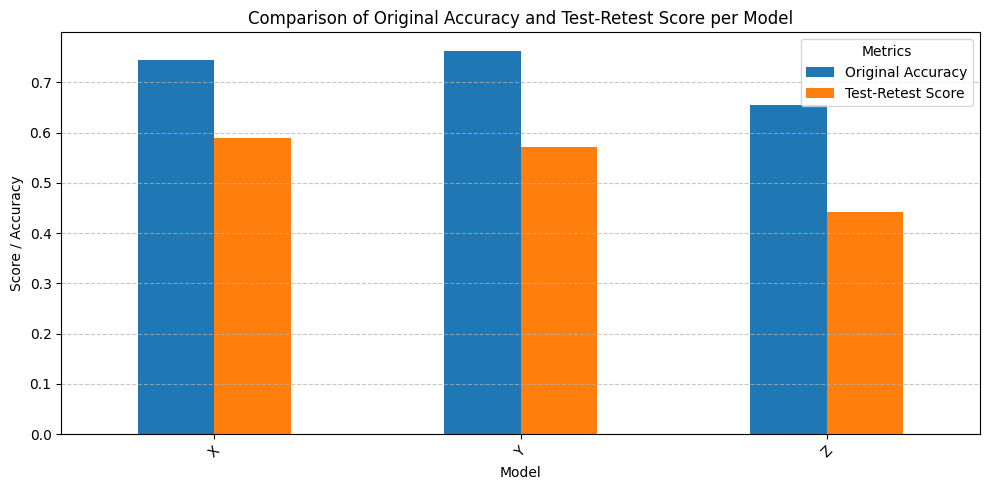

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


df_mmlu = pd.read_csv("data/task_2/lm_scores_mmlu.csv")
df_mmlu_shuffle = pd.read_csv("data/task_2_5/lm_scores_mmlu_shuffle.csv")

#identify unique models
models = df_mmlu["model_name"].unique()

#compute original accuracy for each model
original_accuracy = df_mmlu.groupby("model_name")["correct"].mean()

#compute Test-Retest metric for each model
test_retest_scores = {}

for model in models:
    df_orig_model = df_mmlu[df_mmlu["model_name"] == model]
    df_shuf_model = df_mmlu_shuffle[df_mmlu_shuffle["model_name"] == model]

    #merge on question_id
    merged = df_orig_model.merge(
        df_shuf_model,
        on="question_id",
        suffixes=("_orig", "_shuf")
    )
    
    #number of unique questions. This is N.
    N = merged["question_id"].nunique()
    #number of shuffled versions per question. This is M.
    M = len(df_shuf_model) / N
    print(f"Model: {model}, N: {N}, M: {M}")

    #compute test-retest metric
    test_retest_metric = (merged["correct_orig"] * merged["correct_shuf"]).sum() / (N * M)
    test_retest_scores[model] = test_retest_metric

df_results = pd.DataFrame({
    "Model": models,
    "Original Accuracy": original_accuracy.values,
    "Test-Retest Score": [test_retest_scores[model] for model in models]
})

df_results.sort_values("Model", inplace=True)
df_results.reset_index(drop=True, inplace=True)

print(df_results)

#plot
plt.figure(figsize=(10, 5))
df_results.set_index("Model").plot(kind="bar", figsize=(10, 5))
plt.title("Comparison of Original Accuracy and Test-Retest Score per Model")
plt.xlabel("Model")
plt.ylabel("Score / Accuracy")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [28]:
#A

#Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

#compute the distribution of answers and accuracy for each model
answer_distribution = df_mmlu.groupby("model_name")["result"].value_counts(normalize=True)
accuracy_per_answer = df_mmlu.groupby(["model_name", "result"])["correct"].mean()

print("Answer Distribution per Model:")
print(answer_distribution.unstack().fillna(0))
print("\nAccuracy per Answer per Model:")
print(accuracy_per_answer.unstack().fillna(0))


Answer Distribution per Model:
result             A         B         C         D
model_name                                        
X           0.364142  0.227343  0.205968  0.202548
Y           0.091655  0.192886  0.257780  0.457678
Z           0.186047  0.246666  0.276761  0.290527

Accuracy per Answer per Model:
result             A         B         C         D
model_name                                        
X           0.367927  0.884543  1.000000  1.000000
Y           0.937500  0.897606  0.827861  0.631608
Z           0.476103  0.654073  0.703429  0.727487


B. /Discuss:/

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [29]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    ! pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

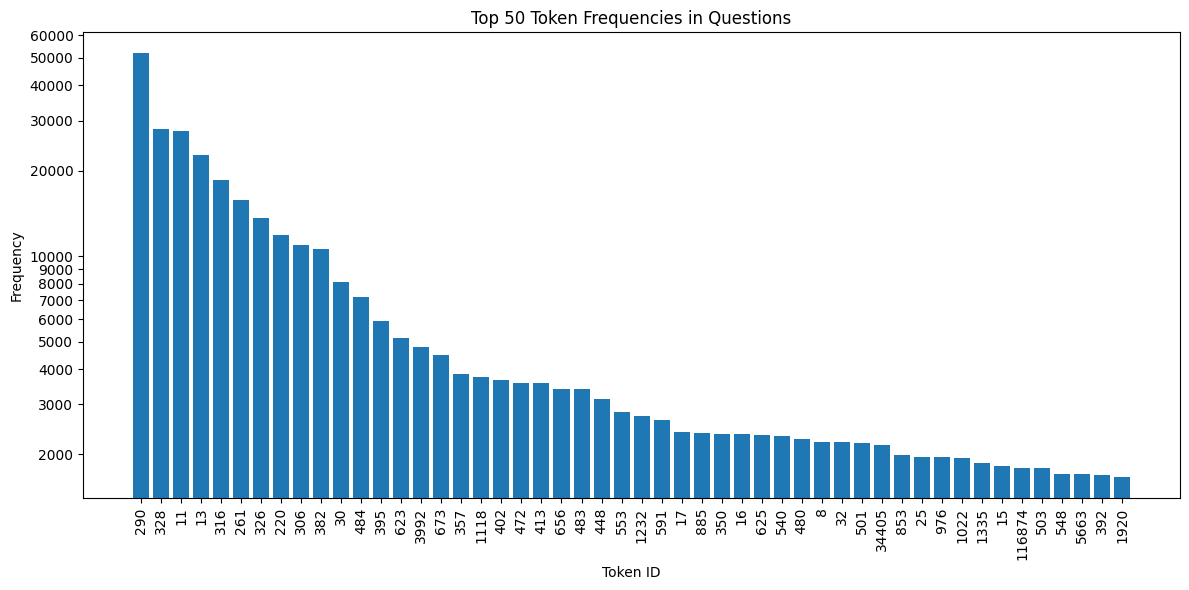

In [30]:
#A

from collections import Counter
import matplotlib.ticker as ticker


df = pd.read_csv("data/task_1/mmlu_data/test.csv")
questions = df["question"].dropna().tolist()

#tokenize each question and accumulate all tokens
all_tokens = []
for question in questions:
    all_tokens.extend(tokenize_text(question))

# count the frequency of each token
token_counts = Counter(all_tokens)

# get the top 50 tokens by frequency
top_tokens = token_counts.most_common(50)
tokens, counts = zip(*top_tokens)

# plot the token frequency distribution
plt.figure(figsize=(12, 6))
plt.bar([str(token) for token in tokens], counts)
plt.yscale('log')

#this locator places ticks at every integer multiple in each decade 
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10)))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlabel("Token ID")
plt.ylabel("Frequency")
plt.title("Top 50 Token Frequencies in Questions")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

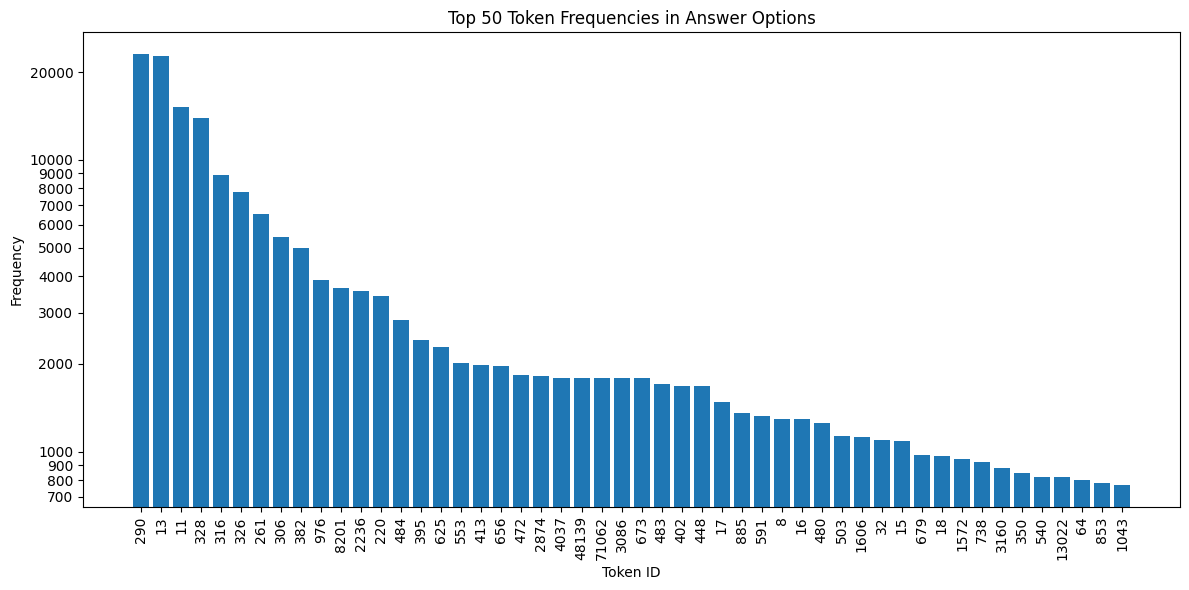

In [31]:
#B

df = pd.read_csv("data/task_1/mmlu_data/test.csv")
answer_columns = ["A", "B", "C", "D"]
all_answer_tokens = []

#ooop through each answer column and tokenize each answer
for col in answer_columns:
    answers = df[col].dropna().tolist()
    for answer in answers:
        all_answer_tokens.extend(tokenize_text(answer))

#count the frequency of each token
token_counts = Counter(all_answer_tokens)

#select the top 50 tokens by frequency
top_tokens = token_counts.most_common(50)
tokens, counts = zip(*top_tokens)

#bar plot for the token frequency distribution
plt.figure(figsize=(12, 6))
plt.bar([str(token) for token in tokens], counts)
plt.yscale('log')

#the following will create ticks at every integer multiple between powers of 10 
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10)))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlabel("Token ID")
plt.ylabel("Frequency")
plt.title("Top 50 Token Frequencies in Answer Options")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
#C
df = pd.read_csv("data/task_1/mmlu_data/test.csv")
all_tokens = []

questions = df["question"].dropna().tolist()
for question in questions:
    all_tokens.extend(tokenize_text(question))

answer_columns = ["A", "B", "C", "D"]
for col in answer_columns:
    answers = df[col].dropna().tolist()
    for answer in answers:
        all_tokens.extend(tokenize_text(answer))

#count the frequency of each token in the combined list
combined_counter = Counter(all_tokens)

# for each of the strings "A", "B", "C", and "D", find its token representation.
# (we assume that tokenizing a single letter returns a list with one token.)
letters = ["A", "B", "C", "D"]
letter_tokens = {letter: tokenize_text(letter)[0] for letter in letters}

# extract the raw counts for each letter token from the combined counter.
letter_counts = {letter: combined_counter[letter_tokens[letter]] for letter in letters}

# compute the total count for these letter tokens.
total_letter_count = sum(letter_counts.values())

print("Relative distribution of tokens for 'A', 'B', 'C', and 'D':")
for letter in letters:
    relative_frequency = letter_counts[letter] / total_letter_count if total_letter_count else 0
    print(f"  {letter}: {relative_frequency:.4f} (raw count: {letter_counts[letter]})")


Relative distribution of tokens for 'A', 'B', 'C', and 'D':
  A: 0.7917 (raw count: 3314)
  B: 0.0602 (raw count: 252)
  C: 0.1015 (raw count: 425)
  D: 0.0466 (raw count: 195)


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [33]:

#A
def compute_token_statistics():
    # Initialize the tokenizer for the GPT-4 model
    tokenizer = tiktoken.encoding_for_model("gpt-4")
    
    # Create a mapping from each letter to its token ID
    letter_to_id = {letter: tokenizer.encode(letter)[0] for letter in "ABCD"}
    
    # List to store token count details for each data entry
    token_info = []
    
    # Iterate over each row in the DataFrame
    for _, record in df_test.iterrows():
        # Concatenate the question and all answer choices into one string
        text_blob = (
            str(record["question"]) +
            str(record["A"]) +
            str(record["B"]) +
            str(record["C"]) +
            str(record["D"])
        )
        # Tokenize the concatenated string
        token_list = tokenizer.encode(text_blob)
        
        # Calculate counts for each target token and the total token count
        counts = {letter: token_list.count(letter_to_id[letter]) for letter in "ABCD"}
        counts["total"] = len(token_list)
        counts["answer"] = record["answer"]
        
        token_info.append(counts)
    
    # Convert the list of dictionaries into a DataFrame
    token_df = pd.DataFrame(token_info)
    
    # Group by the correct answer and compute the mean counts for A, B, C, D, and total tokens
    grouped_means = token_df.groupby("answer")[list("ABCD") + ["total"]].mean()
    
    return grouped_means

# Execute the function and print the results
stats = compute_token_statistics()
print("\nMean token frequencies grouped by correct answer:")
print(stats.round(3))



Mean token frequencies grouped by correct answer:
            A      B      C      D   total
answer                                    
A       0.217  0.025  0.028  0.015  92.990
B       0.212  0.022  0.031  0.018  88.577
C       0.202  0.021  0.035  0.014  92.398
D       0.218  0.020  0.036  0.018  91.854


B. /Discuss:/

The results suggest that the frequency of "A", "B", "C", and "D" tokens in the combined question and answers varies slightly across correct answers. However, these differences are small, meaning there is no strong evidence that the number of specific tokens directly influences the LM’s choice. If the model were biased toward selecting answers based on token frequency, we would expect a stronger correlation. Nonetheless, subtle biases cannot be ruled out, and further testing would be needed to confirm whether token distribution affects answer selection in a meaningful way.

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [34]:
#A
def check_context_length(df):
    lengths = []
    for idx, row in df.iterrows():
        question_tokens = tokenize_text(row['question'])
        answers_tokens = []

        for ans_col in ['A','B','C','D']:
            answers_tokens.extend(tokenize_text(str(row[ans_col])))
        total_len = len(question_tokens) + len(answers_tokens)
        lengths.append(total_len)
    df['context_length'] = lengths
    return df

In [35]:
df = pd.read_csv("data/task_1/mmlu_data/test.csv")
result = check_context_length(df)
#result.head()
print(result.groupby('subject')['context_length'].mean())

subject
abstract algebra                        48.300000
anatomy                                 48.148148
astronomy                               58.203947
business ethics                         57.320000
clinical knowledge                      46.290566
college biology                         62.395833
college chemistry                       61.160000
college computer science                91.240000
college mathematics                     64.490000
college medicine                        92.387283
college physics                         64.450980
computer security                       49.780000
conceptual physics                      30.510638
econometrics                            83.271930
electrical engineering                  32.117241
elementary mathematics                  46.058201
formal logic                            92.380952
global facts                            37.660000
high school biology                     64.412903
high school chemistry                   65

In [36]:
grouped_result = result.groupby('subject')['context_length'].mean()
print("Subjects with average context length > 300:")
print(grouped_result[grouped_result>300])

Subjects with average context length > 300:
subject
high school european history    331.878788
high school world history       328.856540
Name: context_length, dtype: float64


In [37]:
grouped_result = result.groupby('subject')['context_length'].min()
print("Subjects with minimum context length > 300:")
print(grouped_result[grouped_result>300])

Subjects with minimum context length > 300:
Series([], Name: context_length, dtype: int64)


B. /Discuss:/

### B - Discussion

One strategy is to first check the total number of tokens in the question and answer options. If the token count is 300 or less, you can use the turbo model since it is faster and cheaper. However, if the token count exceeds 300, you should switch to a model with a larger context window to ensure that all the information is processed correctly, even if it is more expensive and slower. Additionally, you could consider summarizing or trimming the text to reduce the number of tokens when possible. This way, you optimize cost and speed without compromising the quality of the response.

### 3.4 (4 pt)

/Discuss:/ 


The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

### B - Discussion

**1. Bias and accuracy issues: The performance of LMs varies significantly across subjects and response types. Analysis has shown that some models struggle with certain questions, or show inconsistent accuracy depending on answer formatting.** Tokenisation effects and answer position biases raise concerns about the fairness and reliability of using LMs for grading or assessment purposes.  

**2. Test-retest stability: LMs do not always provide consistent answers to the same questions when answer positions are shuffled, highlighting issues with test-retest reliability.** This variability means that students could receive different scores based on factors unrelated to knowledge, which is problematic for standardised tests.  

**3. Cost vs. Context Length Trade-Off: Cheaper, faster LMs (e.g. "turbo" models) often have limited context windows, leading to incomplete processing of longer questions and answers.** A hybrid strategy - using cheaper models when the context fits, but switching to more powerful models for more complex tasks - could balance cost and effectiveness.  

**4. Potential for misuse and over-reliance: While LMs can enhance learning, over-reliance on them could reduce students' critical thinking and problem-solving skills.** Guidelines need to be established to prevent misuse, such as students relying entirely on AI for tasks (hihi) instead of engaging with the material.